# Newton's Law of Cooling

Please make a copy of this notebook to work in. This will allow me to 'reassign' the notebook after changes

Newton's Law states that *the rate of heat loss of a body is directly proportional to the difference in the temperatures between the body and its surroundings provided the temperature difference is small and the nature of radiating surface remains same.*

## Theoretical Understanding
Monday Sep. 17, 2018


** Problem 1**: Problem formulation

Assuming small temperature differences, construct a differential equation that describes the statement of NLC. Label the temperature of the surroundings as $T_{out}$ and assume it remains constant. Let $T$ be the temperature of the body. Identify any constants you use in the formulation and it's units.

**Problem 2**: Analytical Solution

Solve the differential equation from above analytically, *i.e.* as an expression. Identify what that other information you would need to know explicitly to be able to predict the temperature $T$ at any point in time.

$T = T_{out} + A * e^{-k*t}$

**Problem 3**: Numerical Solution

Use Euler's method to produce a plot of $T(t)$. Use guessed values of any quantities you need to know the explicit values for. Using the same guessed values, plot the analytically derived solution for $T$.

## Application


In [30]:
import numpy as np

#Declare initial conditions and variable values

k = .15
Tout = 22
N = 100
T = np.zeros((N,1)) #Create blank array for temperatures
T[0] = 200
dt = 1

#Euler's method
for ti in range(1,(N*dt)):
    T[ti] = T[ti-1] + dt * k*(Tout - T[ti-1])

Text(0,0.5,u'temperature')

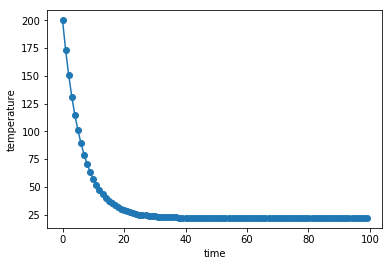

In [32]:
#Plots the guessed values of temperature as a function of time
import matplotlib.pyplot as plt
plt.plot(T,'o-')
plt.xlabel('time')
plt.ylabel('temperature')

In [33]:
import numpy as np

#Declare initial conditions and variable values
k = .15
Tout = 22
N = 100
T = np.zeros((N,1)) #Create blank array for temperatures
T[0] = 200
A = T[0]
dt = 1

#Calculates the analytically derived solution
for ti in range(1,(N*dt)):
    T[ti] = Tout + A* np.exp(-k*ti)

Text(0,0.5,u'temperature')

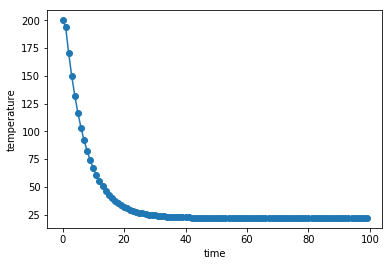

In [35]:
#Plots the analytically derived temperature as a function of time
import matplotlib.pyplot as plt
plt.plot(T,'o-')
plt.xlabel('time')
plt.ylabel('temperature')

## Application


Here we will use real data to explicitly construct Newton's law of cooling, including values of any physical constants.

The data file **`A04_temp.dat`** contains the temperature of an object as it varies through time. In this case, the object warms to an ambient temperature. From this data, find the functional relationship between $\dot{T}$ and $T$, including values of any constants, *i.e.* construct the complete equation for the law of cooling.

### Required numpy methods

*`np.loadtxt()`* - To read data file into array (which by default is a *numpy* array)

*`np.zeros()`* - To create an empty array to store the $\dot{T}$ values corresponding to each $T$.

*`np.polyfit()`* - To find a fit to the points whose coordinates are ($T$, $\dot{T}$). The output of `np.polyfit` returns the slope and y-intercept values.

In [21]:
# load data file
import numpy as np
data = np.loadtxt("A04_temp.dat")

# Create empty array to store calurlcated slope values
T = np.zeros((len(data)-1,2))

# Loop that caluculates slope and fills the empty array created
for i in range(0,len(data)-1):
    T[i][1] = (data[i+1][1] - data[i][1])/(data[i+1][0] - data[i][0])
    T[i][0] = data[i][0]
print(T)

[[  0.00000000e+00   1.85416667e-01]
 [  6.00000000e+01   1.31250000e-01]
 [  1.20000000e+02   7.27459016e-02]
 [  1.81000000e+02   4.06250000e-02]
 [  2.41000000e+02   2.11864407e-02]
 [  3.00000000e+02   1.43442623e-02]
 [  3.61000000e+02   6.25000000e-03]
 [  4.21000000e+02   6.25000000e-03]
 [  4.81000000e+02   3.12500000e-03]
 [  5.41000000e+02   3.17796610e-03]
 [  6.00000000e+02   1.04166667e-03]
 [  6.60000000e+02   5.20833333e-03]
 [  7.20000000e+02   3.07377049e-03]
 [  7.81000000e+02   0.00000000e+00]
 [  8.41000000e+02   1.05932203e-03]]


[-0.000158    0.09942837]


Text(0,0.5,u'Temp/sec')

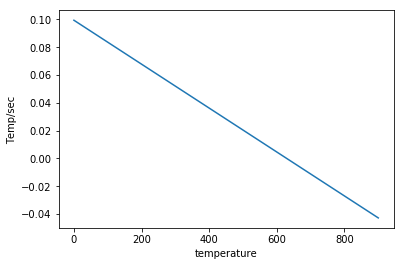

In [47]:
#Declare x and y as components of the newly filled slope array
x = T[:,0]
y = T[:,1]

# finds the slope and y intercerpt t
z = np.polyfit(x,y,1)
print(z)

# Uses the slop and y-intecept to create a polynomial equation
p = np.poly1d(z)
import matplotlib.pyplot as plt

xp = np.linspace(0, max(data[:,0])) #Creates a range from 0 to the highest tempertaure in the data
#Plot x range and the coresponding rates of change as a function
plt.plot(xp, p(xp), '-')
plt.xlabel('temperature')
plt.ylabel('Temp/sec')

$\frac{dT}{dt} = -0.000158\text{s } * T + 0.09942837\text{ deg/sec}$